# Hyperparameters

Кілька прикладів гіперпараметрів, які оптимізують для нейронних мереж:

1. **Кількість шарів (layers)**: Кількість шарів у нейронній мережі визначається глибиною моделі.
2. **Кількість нейронів у кожному шарі (nodes)**: Це кількість нейронів у кожному шарі нейронної мережі.
3. **Швидкість навчання (learning rate)**: Це параметр, який визначає, наскільки швидко модель навчається під час процесу навчання.
4. **Функції активації (activation functions)**: Вони використовуються для передачі сигналів між нейронами у шарах.
5. **Батч-розмір (batch size)**: Кількість прикладів навчання, які використовуються в одному кроці оптимізації.
6. **Кількість епох (epochs)**: Це кількість разів, коли весь набір даних пройшов через нейронну мережу під час навчання.
7. **Регуляризація (regularization)**: Такі як L1 або L2 регуляризація, які допомагають уникнути перенавчання.
8. **Тип оптимізатора (optimizer)**: Алгоритм, який використовується для оновлення ваг моделі під час навчання.

   
Тощо.

In [9]:
import pandas as pd

In [10]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download 
# датасет по виявленню шахрайства з кредитною карткою
df = pd.read_csv("../../data/credit_card_fraud/creditcard.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
len(df[df["Class"] == 1]) / len(df)

0.001727485630620034

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
len(df)

284807

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [17]:
train_dataset[0]

(tensor([ 1.4116,  0.9934, -0.4560, -0.8941, -0.4673,  1.0892,  3.0244, -1.1949,
          0.9571,  1.2814, -0.1445, -0.1108,  0.5093,  0.0621, -0.0696,  1.4511,
          0.4044, -0.9074,  0.1691, -0.5554, -0.1731,  0.1032,  0.4096,  0.4907,
          1.1420, -0.6708, -0.8072,  0.1919, -0.0991, -0.3225]),
 tensor(0.))

In [13]:
train_loader.__dict__

{'dataset': <torch.utils.data.dataset.TensorDataset at 0x17762fe90>,
 'num_workers': 0,
 'prefetch_factor': None,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 128,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x1771d0b10>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x16991b610>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [18]:
# use other metric rather than accuracy
predictions = torch.tensor([0]*len(y_test))  # if we naively classify all as 0
accuracy = (predictions == y_test_tensor).float().mean()
accuracy.item()

0.9982795715332031

In [20]:
y_test_tensor.sum()

tensor(98.)

In [21]:
len(y_test_tensor)

56962

In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score

def evaluate(y_test, predictions):
    print("Recall score (pos. 1):", recall_score(y_test.numpy(), predictions.numpy()))
    print("Precision score (pos. 1):", precision_score(y_test.numpy(), predictions.numpy()))
    print("F1 score (pos. 1):", f1_score(y_test.numpy(), predictions.numpy()))
    print("F1 score (weighted):", f1_score(y_test.numpy(), predictions.numpy(), average="weighted"))
    print("F1 score (micro):", f1_score(y_test.numpy(), predictions.numpy(), average="micro"))
    print("F1 score (marco):", f1_score(y_test.numpy(), predictions.numpy(), average="macro"))

evaluate(y_test_tensor, predictions)

Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Build and optimize

### 1. Number of Layers

In [23]:
# Build the neural network model


class FraudDetectionModel_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [24]:
losses_experiment_1 = []

In [25]:
def run_experiment(model, loss_recording_list, lr=0.01, train_loader=train_loader, epochs=1, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()
    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())
    
    # Train the model
    loss_res = []
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print("Loss:", loss.item())
    loss_recording_list.append(loss_res)
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()
    
    evaluate(y_test_tensor, predictions)


In [26]:
losses_experiment_1 = []

In [27]:
model_1 = FraudDetectionModel_1()
run_experiment(model_1, losses_experiment_1)

Loss: 0.014614501968026161
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


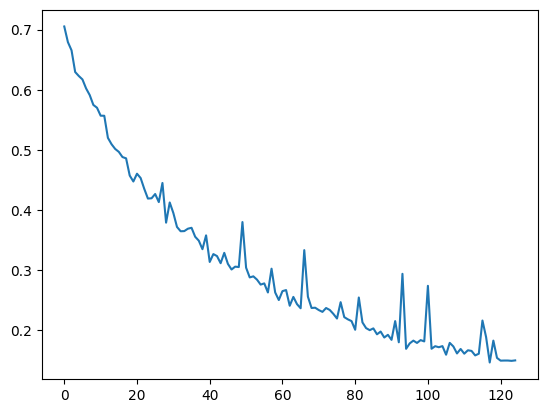

In [28]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_1[0]))
for line in losses_experiment_1:
    plt.plot(x_axis[:125], line[:125])

In [29]:
# Add one more layer

class FraudDetectionModel_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [30]:
losses_experiment_2 = []

In [31]:
model_2 = FraudDetectionModel_2()

run_experiment(model_2, losses_experiment_2)

Loss: 0.0023367111571133137
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


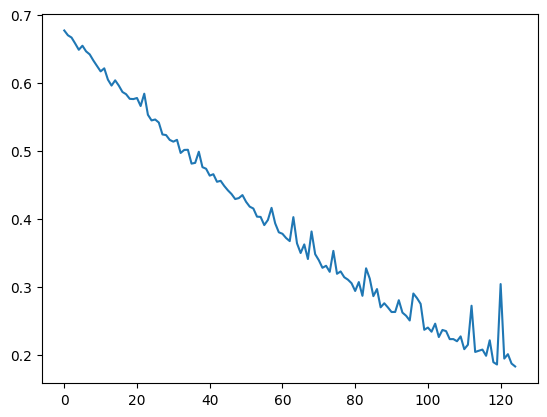

In [32]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_2[0]))
for line in losses_experiment_2:
    plt.plot(x_axis[:125], line[:125])

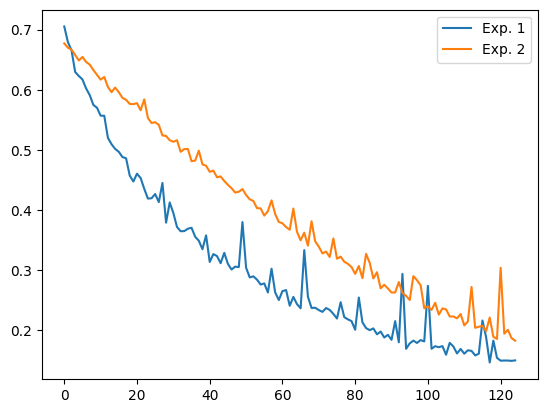

In [33]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.legend()

### 2. Number of Nodes

In [34]:
# Add more nodes

class FraudDetectionModel_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [35]:
losses_experiment_3 = []

In [36]:
model_3 = FraudDetectionModel_3()

run_experiment(model_3, losses_experiment_3)

Loss: 0.00428492296487093
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


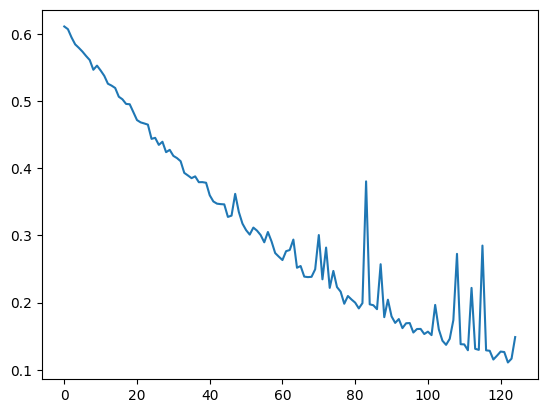

In [37]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_3[0]))
for line in losses_experiment_3:
    plt.plot(x_axis[:125], line[:125])

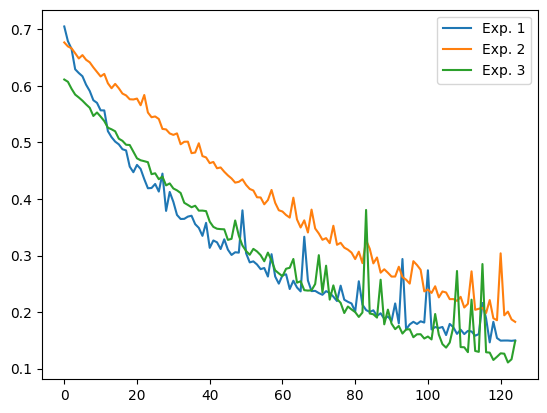

In [38]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")

plt.legend()

In [39]:
# Return to the simple model and increase number of nodes


class FraudDetectionModel_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [40]:
losses_experiment_4 = []

In [41]:
model_4 = FraudDetectionModel_4()
run_experiment(model_4, losses_experiment_4)

Loss: 0.008331709541380405
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


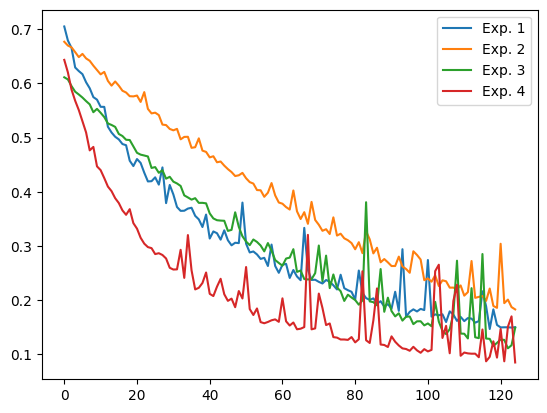

In [42]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")


plt.legend()

### 3. Learning rate

In [43]:
losses_experiment_5 = []

In [44]:
model_5 = FraudDetectionModel_4()

run_experiment(model_5, losses_experiment_5, lr=0.02)


Loss: 0.00273902527987957
Recall score (pos. 1): 0.40816326530612246
Precision score (pos. 1): 0.7843137254901961
F1 score (pos. 1): 0.5369127516778525
F1 score (weighted): 0.9985978670249854
F1 score (micro): 0.9987886661282961
F1 score (marco): 0.7681531457795987


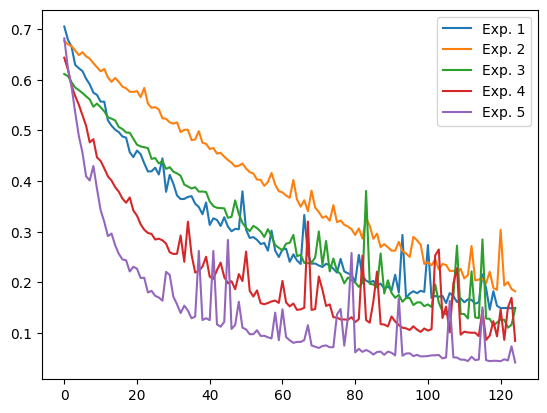

In [45]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")


plt.legend()

### 4. Activation function

https://medium.com/@juanc.olamendy/understanding-relu-leakyrelu-and-prelu-a-comprehensive-guide-20f2775d3d64

In [46]:
# Replace ReLU with PReLU


class FraudDetectionModel_6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [47]:
losses_experiment_6 = []

In [48]:
model_6 = FraudDetectionModel_6()

run_experiment(model_6, losses_experiment_6, lr=0.02)

Loss: 0.005409057252109051
Recall score (pos. 1): 0.22448979591836735
Precision score (pos. 1): 0.7096774193548387
F1 score (pos. 1): 0.34108527131782945
F1 score (weighted): 0.998120701163178
F1 score (micro): 0.9985077771145676
F1 score (marco): 0.6701691570350736


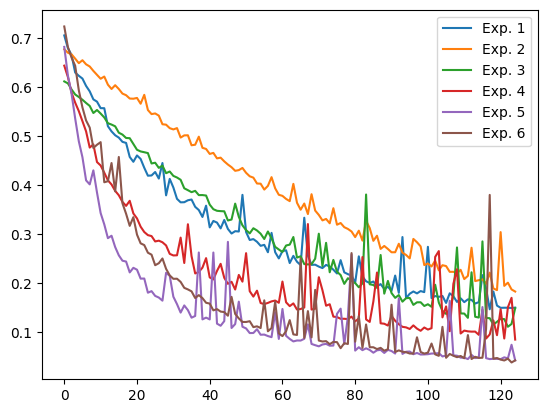

In [49]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")


plt.legend()

### Batch Size

In [50]:
train_loader_new = DataLoader(train_dataset, batch_size=128*2, shuffle=True)

In [51]:
losses_experiment_7 = []

In [52]:
model_7 = FraudDetectionModel_6()

run_experiment(model_7, losses_experiment_7, lr=0.02, train_loader=train_loader_new)

Loss: 0.011097627691924572
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


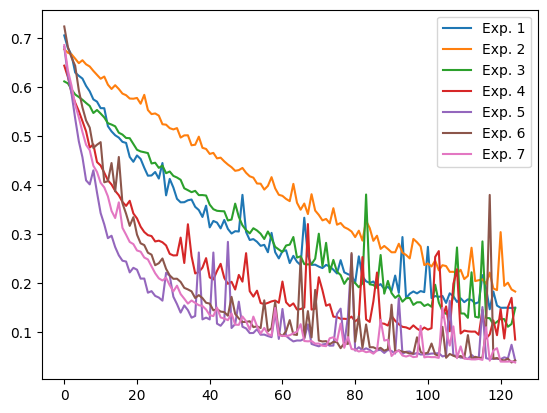

In [53]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")


plt.legend()

### 6. Epochs

In [54]:
losses_experiment_8 = []

In [55]:
model_8 = FraudDetectionModel_6()

run_experiment(model_8, losses_experiment_8, lr=0.02, epochs=3)

Loss: 0.005101996473968029
Loss: 0.0014015799388289452
Loss: 0.0009540804894641042
Recall score (pos. 1): 0.6938775510204082
Precision score (pos. 1): 0.85
F1 score (pos. 1): 0.7640449438202247
F1 score (weighted): 0.999225443764056
F1 score (micro): 0.9992626663389628
F1 score (marco): 0.8818378500332991


/var/folders/yn/89lh00053q9czjvfg4fqc0wc0000gn/T/ipykernel_17174/2020599601.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


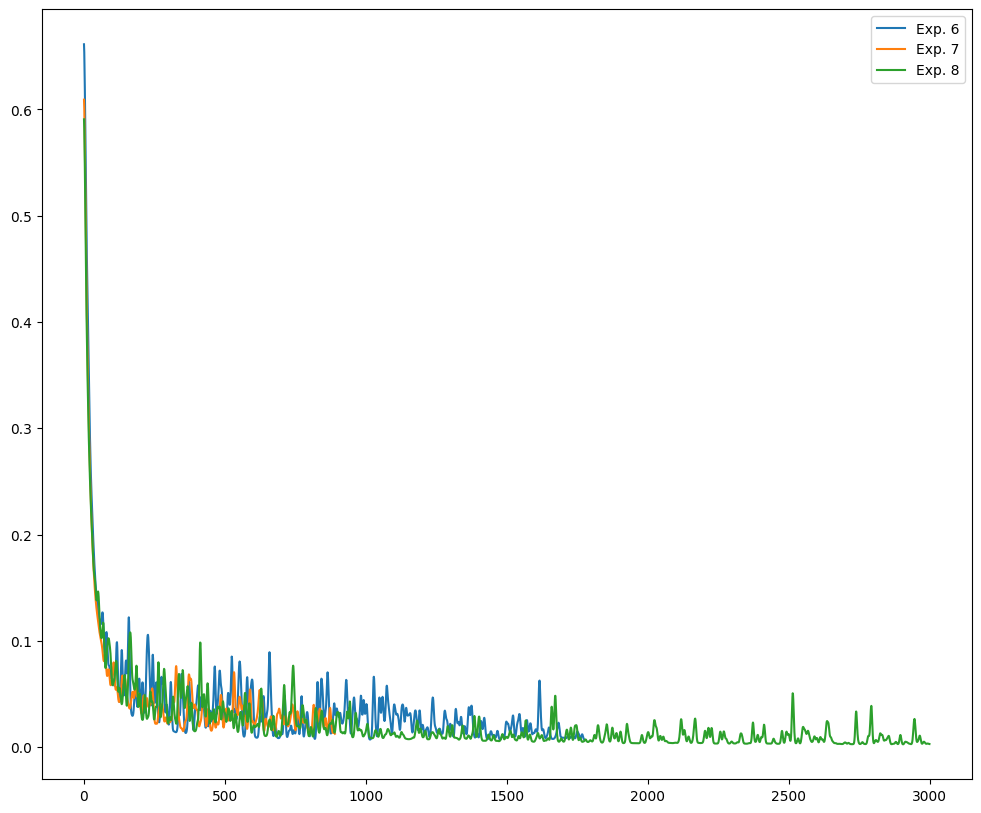

In [56]:
# Compare
from scipy.ndimage.filters import gaussian_filter1d

x_axis_short = range(len(losses_experiment_1[0]))
x_axis_shorter = range(len(losses_experiment_7[0]))
x_axis_long = range(len(losses_experiment_8[0]))

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)

plt.figure(figsize=(12, 10))


#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_1_mean[800:], sigma=3), label="Exp. 1")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_2_mean[800:], sigma=3), label="Exp. 2")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_3_mean[800:], sigma=3), label="Exp. 3")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_4_mean[800:], sigma=3), label="Exp. 4")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_5_mean[800:], sigma=3), label="Exp. 5")
plt.plot(x_axis_short[:], gaussian_filter1d(losses_experiment_6_mean[:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[:], gaussian_filter1d(losses_experiment_7_mean[:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[:3000], gaussian_filter1d(losses_experiment_8_mean[:3000], sigma=3), label="Exp. 8")


plt.legend()

In [57]:
# How do we know where to stop?

def run_experiment_with_early_stopping(model, loss_recording_list, lr=0.01, train_loader=train_loader, val_loader=None, epochs=1, patience=5, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()
    
    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())
    
    # Train the model
    train_loss_res = []
    val_loss_res = []
    
    best_val_loss = float('inf')
    no_improvement_count = 0
    
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            train_loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss.item()}")
        
        # Calculate validation loss
        if val_loader:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs.squeeze(), val_labels).item()
            avg_val_loss = val_loss / len(val_loader)
            val_loss_res.append(avg_val_loss)
            print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {avg_val_loss}")
            
            # Check for early stopping
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if no_improvement_count >= patience:
                    print(f"Early stopping after {epoch + 1} epochs with no improvement.")
                    break
    
    loss_recording_list.append({'train_loss': train_loss_res, 'val_loss': val_loss_res})
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()
    
    evaluate(y_test_tensor, predictions)



In [58]:
losses_experiment_8_2 = []

In [60]:
model_8_2 = FraudDetectionModel_6()

# Create PyTorch DataLoader
val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

run_experiment_with_early_stopping(model_8_2, losses_experiment_8_2, val_loader=val_loader, lr=0.02, epochs=20, patience=2)

Epoch 1/20, Training Loss: 0.005758857354521751
Epoch 1/20, Validation Loss: 0.011085477922813374
Epoch 2/20, Training Loss: 0.002024247543886304
Epoch 2/20, Validation Loss: 0.008087186752808085
Epoch 3/20, Training Loss: 0.0013637326192110777
Epoch 3/20, Validation Loss: 0.006689220795307659
Epoch 4/20, Training Loss: 0.0015928263310343027
Epoch 4/20, Validation Loss: 0.006308168227911714
Epoch 5/20, Training Loss: 0.000836045597679913
Epoch 5/20, Validation Loss: 0.005545767928335833
Epoch 6/20, Training Loss: 0.001032926724292338
Epoch 6/20, Validation Loss: 0.004870142223367743
Epoch 7/20, Training Loss: 0.0015514881815761328
Epoch 7/20, Validation Loss: 0.00445035129726547
Epoch 8/20, Training Loss: 0.0009037003619596362
Epoch 8/20, Validation Loss: 0.004192207537037049
Epoch 9/20, Training Loss: 0.00045965734170749784
Epoch 9/20, Validation Loss: 0.0040503827181687544
Epoch 10/20, Training Loss: 0.00019837221771012992
Epoch 10/20, Validation Loss: 0.0038729262871838974
Epoch 11/

In [61]:
losses_experiment_8_2_train = losses_experiment_8_2[len(losses_experiment_8_2)-1]['train_loss']
losses_experiment_8_2_test = losses_experiment_8_2[len(losses_experiment_8_2)-1]['val_loss']

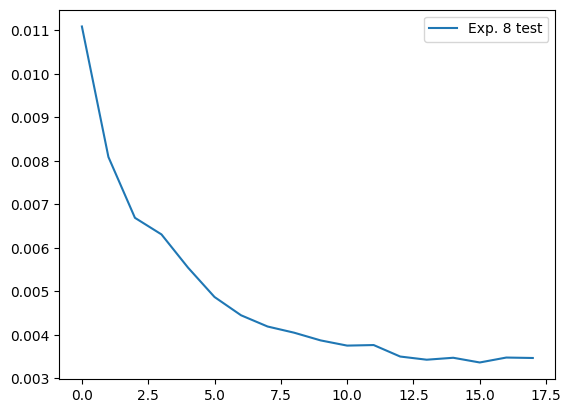

In [62]:

#plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=1), label="Exp. 8")
#plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean_test[start:end], sigma=1), label="Exp. 8 test")

x_axis_train = [i for i in range(len(losses_experiment_8_2_train))]
#plt.plot(x_axis_train, losses_experiment_8_2_train, label="Exp. 8")

factor = len(x_axis_train) // len(losses_experiment_8_2_test)
#x_axis_test = [(i+1)*factor for i in range(len(losses_experiment_8_2_test))]
x_axis_test = [i for i in range(len(losses_experiment_8_2_test))]
plt.plot(x_axis_test, losses_experiment_8_2_test, label="Exp. 8 test")


plt.legend()

### 7. Regularization

In [63]:
# Add dropout


class FraudDetectionModel_7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [64]:
losses_experiment_9 = []

In [65]:
model_9 = FraudDetectionModel_7()

run_experiment(model_9, losses_experiment_9, lr=0.02, epochs=3)

Loss: 0.010624163784086704
Loss: 0.0010328135685995221
Loss: 0.004800279159098864
Recall score (pos. 1): 0.6428571428571429
Precision score (pos. 1): 0.8289473684210527
F1 score (pos. 1): 0.7241379310344829
F1 score (weighted): 0.9991041423931677
F1 score (micro): 0.9991573329588147
F1 score (marco): 0.8618579765062524


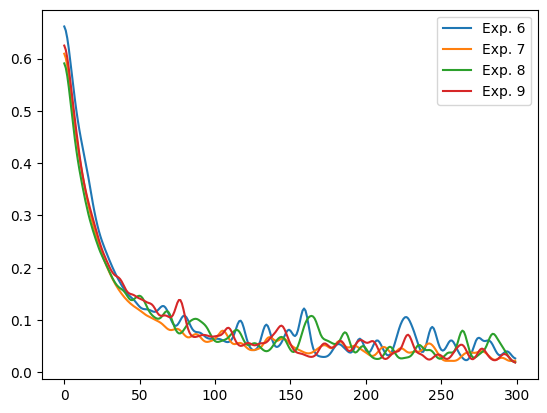

In [66]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)

start = 0
end = 300
plt.plot(x_axis_short[start:end], gaussian_filter1d(losses_experiment_6_mean[start:end], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:end], gaussian_filter1d(losses_experiment_7_mean[start:end], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")



plt.legend()

### 8. Optimizer

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [67]:
losses_experiment_10 = []

In [68]:
model_10 = FraudDetectionModel_7()
# https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
run_experiment(model_10, losses_experiment_10, lr=None, epochs=3, optimizer=optim.Adam)

Loss: 0.00010225721780443564
Loss: 0.0010349819203838706
Loss: 6.293490150710568e-05
Recall score (pos. 1): 0.3877551020408163
Precision score (pos. 1): 0.9743589743589743
F1 score (pos. 1): 0.5547445255474452
F1 score (weighted): 0.9986987953045848
F1 score (micro): 0.9989291106351603
F1 score (marco): 0.7771042180937504


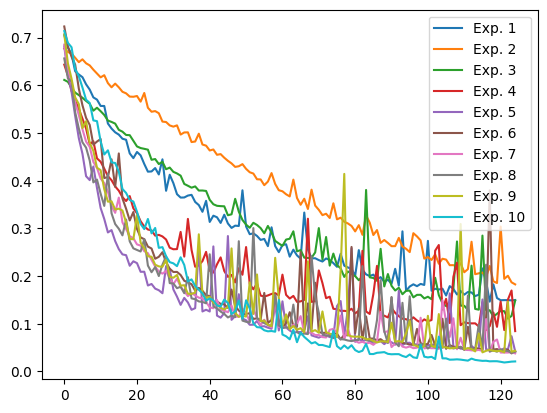

In [69]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")
plt.plot(x_axis[:125], losses_experiment_8_mean[:125], label="Exp. 8")
plt.plot(x_axis[:125], losses_experiment_9_mean[:125], label="Exp. 9")
plt.plot(x_axis[:125], losses_experiment_10_mean[:125], label="Exp. 10")


plt.legend()

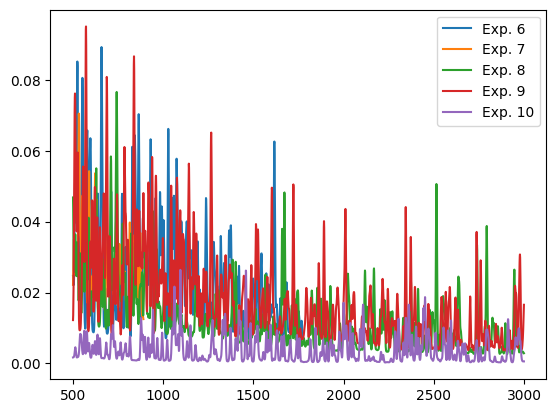

In [70]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)

start = 500
end = 3000
plt.plot(x_axis_short[start:], gaussian_filter1d(losses_experiment_6_mean[start:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:], gaussian_filter1d(losses_experiment_7_mean[start:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_10_mean[start:end], sigma=3), label="Exp. 10")



plt.legend()

## Hyperparameter Optimization

### Grid Search

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, TransformerMixin

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(nn.ReLU())
            input_size = num_nodes

        self.model = nn.Sequential(*layers)

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Define a custom PyTorch estimator for scikit-learn compatibility
class PyTorchEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, model, criterion=nn.BCELoss(), optimizer_class=optim.Adam, lr=0.001, batch_size=64, epochs=10):
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        print("Initialized new Estimator")

    def fit(self, X, y):
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            predictions = (outputs.squeeze() > 0.5).float()
        return predictions.numpy()

    def get_params(self, deep=True):
        return {'model': self.model, 'criterion': self.criterion,
                'optimizer_class': self.optimizer_class, 'lr': self.lr,
                'batch_size': self.batch_size, 'epochs': self.epochs}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



# Create a pipeline with the PyTorch model
pipeline = Pipeline([
    ('model', PyTorchEstimator(model=FraudDetectionModel(input_size=X_train.shape[1], num_layers=1, num_nodes=64)))
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'model__num_layers': [1, 2, 3],
    'model__num_nodes': [32, 64, 128],
    'model__lr': [0.001, 0.01, 0.1]
}

# Define F1 scorer for GridSearchCV
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1_scorer, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tensor, y_train_tensor)

# Print best hyperparameters and corresponding F1 score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator


/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/utils/__init__.py:184: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:212.)
  return array[key] if axis == 0 else array[:, key]
/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/utils/__init__.py:184: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a te

Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized 

## Bonus: Experiment Tracking with **MLflow**

https://www.mlflow.org/docs/latest/tracking.html#logging-data-to-runs

https://mlflow.org/docs/latest/getting-started/logging-first-model/notebooks/logging-first-model.html

In [1]:
'''
$mlflow server --host 127.0.0.1 --port 8080
'''

'\n$mlflow server --host 127.0.0.1 --port 8080\n'

In [2]:
# Experiment tracking
import mlflow
from mlflow import MlflowClient

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")


In [3]:
all_experiments = client.search_experiments()
all_experiments

[<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1714407941699, experiment_id='0', last_update_time=1714407941699, lifecycle_stage='active', name='Default', tags={}>]

In [4]:

# Use the fluent API to set the tracking uri and the active experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Sets the current active experiment to the "Apple_Models" experiment and returns the Experiment metadata
experiment = mlflow.set_experiment("Python_Data_Models")
# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "HP_opt"

# Define an artifact path that the model will be saved to.


2024/04/29 18:26:02 INFO mlflow.tracking.fluent: Experiment with name 'Python_Data_Models' does not exist. Creating a new experiment.


## Bonus: Bayesian Optimization

https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import optuna  


# We use here Bayesian optimization
### Optuna uses a history record of trials to determine which hyperparameter values to try next. 
### Using this data, it estimates a promising area and tries values in that area. 
###Optuna then estimates an even more promising region based on the new result. 
###It repeats this process using the history data of trials completed thus far. 
###Specifically, it employs a Bayesian optimization algorithm called Tree-structured Parzen Estimator.
# Alternatives: https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/003_efficient_optimization_algorithms.html


# Display basic information about the dataset
print(df.info())

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel with hyperparameters
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes, activation, dropout_rate):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(get_activation(activation))
            layers.append(nn.Dropout(dropout_rate))
            input_size = num_nodes

        self.model = nn.Sequential(*layers[:-2])  # Exclude the last activation and dropout

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

def get_activation(activation):
    if activation == 'relu':
        return nn.ReLU()
    elif activation == 'tanh':
        return nn.Tanh()
    elif activation == 'sigmoid':
        return nn.Sigmoid()
    else:
        raise ValueError(f"Unknown activation function: {activation}")

# Define the objective function for Optuna
def objective(trial):
    print("Starting experiment")
    input_size = X_train.shape[1]
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_nodes = trial.suggest_int('num_nodes', 32, 256)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 30)

    model = FraudDetectionModel(input_size, num_layers, num_nodes, activation, dropout_rate)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()

    f1 = f1_score(y_test_tensor.numpy(), predictions.numpy())

    # Log metrics with MLflow
    with mlflow.start_run(run_name=run_name) as run:
        mlflow.log_params({
            'num_layers': num_layers,
            'num_nodes': num_nodes,
            'activation': activation,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        })
        mlflow.log_metric('f1_score', f1)
    print("Ran experiment. 'f1_score'", f1)

    return f1  # Optimize for F1 score

# Run the hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and corresponding F1 score
print(f"Best F1 Score: {-study.best_value:.4f}")
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"{key}: {value}")


[I 2024-04-29 18:26:27,120] A new study created in memory with name: no-name-01950df8-1c0d-492a-bedb-f26898471ee3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

[I 2024-04-29 18:26:56,267] Trial 0 finished with value: 0.0 and parameters: {'num_layers': 1, 'num_nodes': 57, 'activation': 'tanh', 'dropout_rate': 0.25158473549112476, 'learning_rate': 0.023529944266370912, 'batch_size': 64, 'epochs': 19}. Best is trial 0 with value: 0.0.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:28:23,559] Trial 1 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 152, 'activation': 'sigmoid', 'dropout_rate': 0.3085783662051693, 'learning_rate': 0.07065348491435801, 'batch_size': 32, 'epochs': 22}. Best is trial 0 with value: 0.0.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:28:57,894] Trial 2 finished with value: 0.7918781725888324 and parameters: {'num_layers': 1, 'num_nodes': 80, 'activation': 'relu', 'dropout_rate': 0.2767491162437293, 'learning_rate': 0.06184443744326261, 'batch_size': 64, 'epochs': 22}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.7918781725888324
Starting experiment


[I 2024-04-29 18:29:35,866] Trial 3 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 193, 'activation': 'relu', 'dropout_rate': 0.4363835156418066, 'learning_rate': 0.0389963561669606, 'batch_size': 128, 'epochs': 15}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:31:06,132] Trial 4 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 192, 'activation': 'relu', 'dropout_rate': 0.0512017614466978, 'learning_rate': 0.04388739730798038, 'batch_size': 64, 'epochs': 24}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:31:52,264] Trial 5 finished with value: 0.6837606837606838 and parameters: {'num_layers': 1, 'num_nodes': 60, 'activation': 'tanh', 'dropout_rate': 0.42758430318477214, 'learning_rate': 0.08800515657593501, 'batch_size': 32, 'epochs': 20}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.6837606837606838
Starting experiment


[I 2024-04-29 18:33:17,798] Trial 6 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 157, 'activation': 'relu', 'dropout_rate': 0.47994059040857795, 'learning_rate': 0.02912451223063373, 'batch_size': 32, 'epochs': 16}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:34:37,649] Trial 7 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 212, 'activation': 'sigmoid', 'dropout_rate': 0.40805769187463725, 'learning_rate': 0.01100501711946464, 'batch_size': 64, 'epochs': 25}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:34:51,952] Trial 8 finished with value: 0.0 and parameters: {'num_layers': 1, 'num_nodes': 121, 'activation': 'relu', 'dropout_rate': 0.33585156919479986, 'learning_rate': 0.06512002468394883, 'batch_size': 64, 'epochs': 9}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:35:11,868] Trial 9 finished with value: 0.3653846153846154 and parameters: {'num_layers': 1, 'num_nodes': 66, 'activation': 'relu', 'dropout_rate': 0.40514475683371876, 'learning_rate': 0.09831344179944525, 'batch_size': 64, 'epochs': 13}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.3653846153846154
Starting experiment


[I 2024-04-29 18:36:02,971] Trial 10 finished with value: 0.6696428571428572 and parameters: {'num_layers': 2, 'num_nodes': 106, 'activation': 'tanh', 'dropout_rate': 0.10759357762350996, 'learning_rate': 0.06023275937045738, 'batch_size': 128, 'epochs': 30}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.6696428571428572
Starting experiment


[I 2024-04-29 18:37:08,618] Trial 11 finished with value: 0.0 and parameters: {'num_layers': 1, 'num_nodes': 37, 'activation': 'tanh', 'dropout_rate': 0.1542563256215661, 'learning_rate': 0.09556799026895754, 'batch_size': 32, 'epochs': 29}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:37:59,513] Trial 12 finished with value: 0.7655502392344496 and parameters: {'num_layers': 1, 'num_nodes': 90, 'activation': 'tanh', 'dropout_rate': 0.21391988015746444, 'learning_rate': 0.08075861070015036, 'batch_size': 32, 'epochs': 21}. Best is trial 2 with value: 0.7918781725888324.


Ran experiment. 'f1_score' 0.7655502392344496
Starting experiment


[I 2024-04-29 18:38:13,897] Trial 13 finished with value: 0.7939698492462313 and parameters: {'num_layers': 1, 'num_nodes': 99, 'activation': 'tanh', 'dropout_rate': 0.21747160925913953, 'learning_rate': 0.07793483905905862, 'batch_size': 32, 'epochs': 6}. Best is trial 13 with value: 0.7939698492462313.


Ran experiment. 'f1_score' 0.7939698492462313
Starting experiment


[I 2024-04-29 18:38:28,757] Trial 14 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 247, 'activation': 'sigmoid', 'dropout_rate': 0.2094932892944506, 'learning_rate': 0.05675748156792759, 'batch_size': 128, 'epochs': 6}. Best is trial 13 with value: 0.7939698492462313.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:38:46,147] Trial 15 finished with value: 0.0 and parameters: {'num_layers': 1, 'num_nodes': 127, 'activation': 'relu', 'dropout_rate': 0.29969218121106594, 'learning_rate': 0.0788432618799082, 'batch_size': 64, 'epochs': 11}. Best is trial 13 with value: 0.7939698492462313.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-04-29 18:39:03,135] Trial 16 finished with value: 0.2745098039215686 and parameters: {'num_layers': 2, 'num_nodes': 84, 'activation': 'tanh', 'dropout_rate': 0.007547069799046402, 'learning_rate': 0.04878860324875461, 'batch_size': 32, 'epochs': 5}. Best is trial 13 with value: 0.7939698492462313.


Ran experiment. 'f1_score' 0.2745098039215686
Starting experiment


[I 2024-04-29 18:40:02,274] Trial 17 finished with value: 0.7017543859649124 and parameters: {'num_layers': 1, 'num_nodes': 37, 'activation': 'relu', 'dropout_rate': 0.1594186042959981, 'learning_rate': 0.0732526918590717, 'batch_size': 32, 'epochs': 26}. Best is trial 13 with value: 0.7939698492462313.


Ran experiment. 'f1_score' 0.7017543859649124
Starting experiment


[I 2024-04-29 18:40:16,425] Trial 18 finished with value: 0.7783251231527093 and parameters: {'num_layers': 1, 'num_nodes': 97, 'activation': 'tanh', 'dropout_rate': 0.3581680251534862, 'learning_rate': 0.059733456891112646, 'batch_size': 64, 'epochs': 9}. Best is trial 13 with value: 0.7939698492462313.


Ran experiment. 'f1_score' 0.7783251231527093
Starting experiment


[I 2024-04-29 18:40:49,718] Trial 19 finished with value: 0.8342245989304812 and parameters: {'num_layers': 2, 'num_nodes': 137, 'activation': 'sigmoid', 'dropout_rate': 0.25666159016838674, 'learning_rate': 0.0014752624122379432, 'batch_size': 128, 'epochs': 18}. Best is trial 19 with value: 0.8342245989304812.


Ran experiment. 'f1_score' 0.8342245989304812
Best F1 Score: -0.8342
Best Hyperparameters:
num_layers: 2
num_nodes: 137
activation: sigmoid
dropout_rate: 0.25666159016838674
learning_rate: 0.0014752624122379432
batch_size: 128
epochs: 18
